# Fronteiras de decisão

Usaremos o conjunto de dados Iris para ilustrar um regressão logística. Este conjunto tem o comprimento e a largura das sépalas e pétalas de 150 flores íris de 3 espécies diferentes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

Vamos criar um identificador para detectar o tipo *Iris virginica* com base na largura da pétala.

In [3]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int_)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
lr_clf = LogisticRegression()
lr_clf.fit(X,y)

LogisticRegression()

Vamos analisar as probabilidades estimadas do modelo de flores com a largura das pétalas variando de 0 a 3cm.

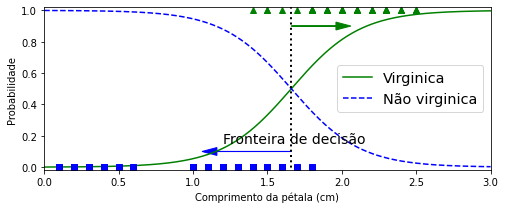

In [52]:
''' A função reshape() possibilita que uma dimensão seja -1, qu significa 'não especificado'. O valor é determinado 
a partir do comprimento da matriz e das dimensões restantes'''
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = lr_clf.predict_proba(X_new)
#Tamanho do gráfico
plt.figure(figsize=(8, 3))
#Curvas de probabilidade
plt.plot(X_new, y_proba[:,1], 'g-', label='Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Não virginica')
#Pontos das flores
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
#Fronteira de descisão
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] #Primeiro elemento com probabilidade maior que 50% de ser virginica
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Fronteira de decisão", fontsize=14, color="k", ha="center")#Linha vertical da fronteira de descisão
plt.arrow(decision_boundary, 0.10, -0.5, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')#Seta não virginica
plt.arrow(decision_boundary, 0.90, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')#Seta virginica
#Gráfico
plt.legend(fontsize=20)
plt.legend(fontsize="x-large")
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Probabilidade")
plt.axis([0, 3, -0.02, 1.02])
plt.show();